<IPython.core.display.Javascript object>

Image saved to photo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


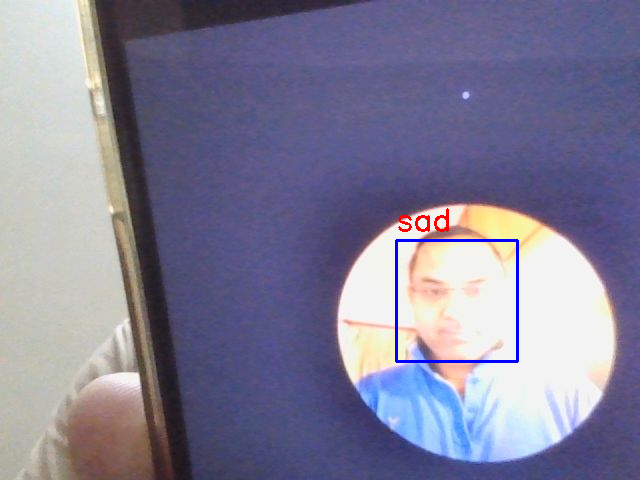

In [3]:
# # 📦 Install dependencies
# !pip install -q keras==2.12.0 tensorflow==2.12.0

# 📷 Webcam Capture Function
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
import cv2
import numpy as np
import PIL.Image
import io
import base64

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Take Photo';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for the user to click the button.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
    with open(filename, 'wb') as f:
        f.write(binary.getbuffer())
    return filename

# 🧠 Load your emotion detection model
from keras.models import model_from_json

# Load model
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

# 📦 Load Haar Cascade
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# 🔍 Feature Extraction Function
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# 🤖 Emotion Labels
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

# 📸 Take a Photo
image_path = take_photo()
print(f"Image saved to {image_path}")

# 🖼️ Read & Process Image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# 🎯 Predict Emotion
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_resized = cv2.resize(roi_gray, (48, 48))
    features = extract_features(roi_resized)
    prediction = model.predict(features)
    predicted_label = labels[prediction.argmax()]

    # Draw box and label
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img, predicted_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# 🖼️ Display Result
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
PIL.Image.fromarray(img_rgb)


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

KeyboardInterrupt: 